In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [59]:
# Load dataset
df = pd.read_csv('Salary_Data.csv')

In [60]:
X = df[['YearsExperience']]
y = df[['Salary']]

In [61]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

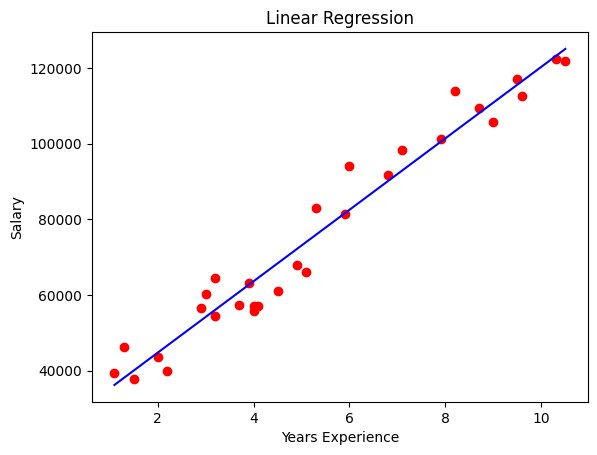

In [62]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Linear Regression')
    plt.xlabel('Years Experience')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

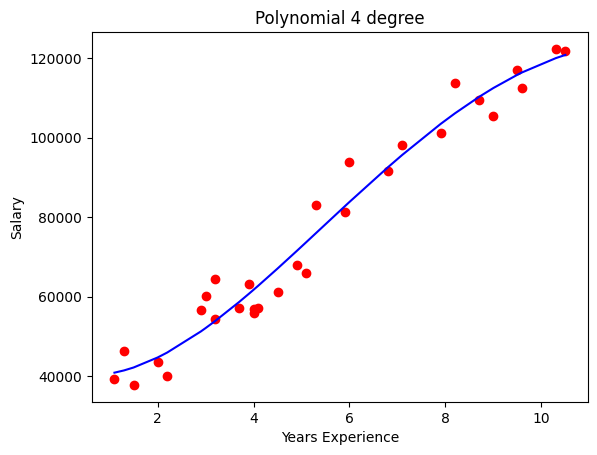

In [63]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Polynomial 4 degree')
    plt.xlabel('Years Experience')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [64]:
# 1. Predict pred_mean
y_train_mvp = y_train.copy()
Salary_pred_mean = y_train_mvp.Salary.mean()
y_train_mvp['Salary_pred_mean'] = Salary_pred_mean

In [67]:
# 2. compute pred_median
Salary_pred_median = y_train_mvp.Salary.median()
y_train_mvp['Salary_pred_median'] = Salary_pred_median
y_train_mvp.head()

,Salary,Salary_pred_mean,Salary_pred_median
23,113812,73431.333333,66029.0
18,81363,73431.333333,66029.0
4,39891,73431.333333,66029.0
3,43525,73431.333333,66029.0
24,109431,73431.333333,66029.0


In [68]:
# 3. RMSE of pred_mean
rmse_train = mean_squared_error(y_train_mvp.Salary, y_train_mvp.Salary_pred_mean) ** .5
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2))

RMSE using Mean
Train/In-Sample:  26087.51


In [69]:
# 4. RMSE of pred_median
rmse_train = mean_squared_error(y_train_mvp.Salary, y_train_mvp.Salary_pred_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2))

RMSE using Median
Train/In-Sample:  27117.39


In [70]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [72]:
y_train_mvp['Salary_pred_lm'] = lm.predict(X_train)

In [73]:
# evaluate: rmse
rmse_train = mean_squared_error(y_train_mvp.Salary, y_train_mvp.Salary_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train)

RMSE for OLS using LinearRegression
Training/In-Sample:  5723.304601101669


In [74]:
# R2 for train
explained_variance_score(y_train_mvp.Salary, y_train_mvp.Salary_pred_lm)

0.9518686093824901

In [75]:
# make the polynomial features to get a new set of features
pf4 = PolynomialFeatures(degree=4)

# fit and transform X_train_scaled
X_train_degree4 = pf4.fit_transform(X_train)

# create the model object
lm4 = LinearRegression()

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm4.fit(X_train_degree4, y_train)

# predict train
y_train_mvp['Salary_pred_lm4'] = lm4.predict(X_train_degree4)

In [76]:
# evaluate: rmse
rmse_train = mean_squared_error(y_train_mvp.Salary, y_train_mvp.Salary_pred_lm4) ** (1/2)

print("RMSE for Polynomial Model, degrees=4\nTraining/In-Sample: ", rmse_train)

RMSE for Polynomial Model, degrees=4
Training/In-Sample:  5127.916081867939


In [77]:
# R2 for train
explained_variance_score(y_train_mvp.Salary, y_train_mvp.Salary_pred_lm4)

0.9613618336557737

In [79]:
y_test_mvp = y_test.copy()

# predict on test
y_test_mvp['Salary_pred_lm4'] = lm4.predict(pf4.fit_transform(X_test))

# evaluate: rmse
rmse_test = mean_squared_error(y_test_mvp.Salary, y_test_mvp.Salary_pred_lm4)**(1/2)

print("RMSE for 4 degree Polynomial model\nOut-of-Sample Performance: ", round(rmse_test,2))

RMSE for 4 degree Polynomial model
Out-of-Sample Performance:  5469.3


In [80]:
# R2 for test
explained_variance_score(y_test_mvp.Salary, y_test_mvp.Salary_pred_lm4)

0.964341128042247

In [82]:
# Prompt the user to enter a salary
print('Salary Prediction')
print('-----------------------')
try:
    Salary = float(input("Enter experience (in years): "))
except ValueError:
    print("Invalid input. Please enter numeric values.")
    sys.exit()

# Input as numpy array
input_features = np.array([[Salary]])
input_transform = pf4.fit_transform(input_features)


# Make prediction
prediction = lm4.predict(input_transform)
prediction = prediction[0][0]
print(f"The predicted Salary is: ${prediction:.2f}")

Salary Prediction
-----------------------
Enter experience (in years): 10
The predicted Salary is: $118842.59
